In [1]:
import numpy as np
import CorrSearchDT as C
import matplotlib.pyplot as plt
%matplotlib inline

Generating query: 100%|██████████| 300/300 [00:00<00:00, 532.54it/s]


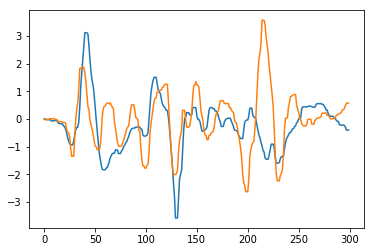

In [2]:
CS = C.CorrSearch()
# extracting query global motion
query = CS.compute_query('data/example_1.mp4')
plt.plot(query)

In [5]:
# generating target candidates
CS.compute_trajectory('data/example_0.mp4', traj_dirname='data/example', force_overwrite=False)

# evaluating target candidates
result = CS.estimate_trajectory_targetness(query, 'data/example_pc64.csv', ub_th=1, clsf_fname='model.npy')

Directory exists! If you want to overwrite the trajectory directory, change force_overwrite option to True.
Please make sure that force_overwrite=True will execute 'rm -rf data/example' and 'rm -rf data/example/csv'.


Estimating targetness: 100%|██████████| 21/21 [00:00<00:00, 575.09it/s]


Adopting KNN Regressor: 100%|██████████| 1/1 [00:00<00:00, 19.40it/s]


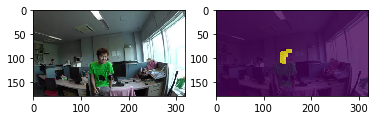

In [4]:
# generating targetness map

frame_list = [0] # list of frames to be evaluated
tarmap = CS.estimate_pixel_targetness(result, frame_list=frame_list)

# visualization
img = C.vread('data/example_0.mp4')[frame_list[0]]
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(tarmap[:, :, 0], alpha=.8)